# PROJET DATA MINING: Credit card clustering

> Membres du groupe

* MOUSSAAIF Youssef p2211877
* ESSAFI Ahmed Yassir p2212312
* DODO MAMANE Abari p2214579

 


### NOTE: Distribution des tâches
On a réalisé le projet  tous les trois. Nous avons pris une salle à la BU pour faire toutes les parties esemble. Il nous est impossible de partager les parties vue que chacun à contribuer dans toutes les parties.  


# Présentation du projet et description de la dataset choisie
L'exemple de jeu de données résume le comportement d'utilisation d'environ 9 000 titulaires actifs de cartes de crédit au cours de 6 mois. Le fichier est au niveau client avec 18 variables comportementales.
Voici le dictionnaire de données pour l'ensemble de données de carte de crédit:

**CUSTID** : Identification du titulaire de la carte de crédit (Catégorique) 

**BALANCE** : montant du solde restant sur leur compte pour effectuer des achats (BALANCEFREQUENCY : fréquence de mise à jour du solde, score compris entre 0 et 1 (1 = fréquemment mis à jour, 0 = pas fréquemment mis à jour).

**ACHATS** : Montant des achats effectués depuis le compte.

**ACHATS UNIQUES** : Montant maximum d'achat effectué en une seule fois.

**ACHATS EN FRAIS** : Montant de l'achat effectué en plusieurs fois.

**CASHADVANCE** : Paiement d'avance donné par l'utilisateur.

**PURCHASESFREQUENCY** : Fréquence des achats, score entre 0 et 1 (1 = fréquemment acheté, 0 = pas fréquemment acheté).

**ONEOFFPURCHASESFREQUENCY** : fréquence des achats en une seule fois (1 = fréquemment acheté, 0 = peu fréquent).

**PURCHASESINSTALLMENTSFREQUENCY** : Fréquence des achats en plusieurs fois (1 = fréquemment effectués, 0 = peu fréquents).

**CASHADVANCEFREQUENCY** : Fréquence de versement de l'avance en espèces.

**CASHADVANCETRX** : Nombre de transactions effectuées avec "Cash in Advanced".

**PURCHASESTRX** : Nombre de transactions d'achat effectuées.

**CREDITLIMIT** : limite de carte de crédit pour l'utilisateur.

**PAIEMENTS** : Montant du paiement effectué par l'utilisateur.

**MINIMUM_PAYMENTS** : Montant minimum des paiements effectués par l'utilisateur.

**PRCFULLPAYMENT** : Pourcentage du paiement total payé par l'utilisateur.

**TENURE** : Durée du service de carte de crédit pour l'utilisateur.


lien de la dataset: [dataset](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Data_mining_project 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import BayesianGaussianMixture
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score


# Fonctions utilisées 

In [ ]:
def outlier_checker(df):
  """
    Verifier la presence des
  """
  for i in data:
      Q1 = data[i].quantile(0.25)
      Q3 = data[i].quantile(0.75)
      IQR = Q3-Q1
      up = Q3 + 1.5*IQR
      low = Q1 - 1.5*IQR

      if data[(data[i] > up) | (data[i] < low)].any(axis=None):
          print(i,"yes")
      else:
          print(i, "no")

def box_plotter(data):
  """
   Affichage box plot des colonnes    
  """
  columns = data.columns
  plt.figure(figsize=(24, 72))
  i = 1
  for c in columns:
    plt.subplot(len(columns), 3, i)
    sns.boxplot(x=data[c])
    i+=1
  plt.show()    

def outlier_replacer(data):
  """
  Remplaçage des outliers en utilisant les quantiles et l'IQR 
  """
  for i in data.iloc[:,:-1]:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    up_lim = Q3 + 1.5 * IQR
    low_lim = Q1 - 1.5 * IQR
    data.loc[data[i] > up_lim,i] = up_lim
    data.loc[data[i] < low_lim,i] = low_lim

def hist_plotter(data):

  """
  Affichage Histogramme des colonnes du dataframe
  """
  columns = data.columns
  plt.figure(figsize=(24, 80))
  i = 1
  for c in data:
    plt.subplot(len(columns), 3, i)
    sns.histplot(x = c, data = data)
    i+=1
    plt.title(c)   
  plt.show()   

# Data exploration

## Description: Dans cette partie nous allons:
* Charger la dataset
* Faire ressortir Quelques statistiques sur la dataset
* Apprende à mieux connaitre la dataset

### NOTE 1 : Chargement de la dataset

> Chargement de la dataset à l'aide de la fonction read_csv.    

In [ ]:
data = pd.read_csv('dataset.csv')

### NOTE 2 : Statistiques de notre dataset

> La dataset est constitué de 8950 records et de 18 caractérisques (features)

In [ ]:
# Shape de la dataset 
data.shape

(8950, 18)

In [ ]:
# Affichage de 10 premiers enregistrements
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### NOTE 3 : Description et statistiques de la dataset

> * les données sont de types divers : Float, int, object. Les Valeurs de  certaines variables sont null, par exemple : CREDIT_LIMIT a  8949 valeurs non-null sur les 8950 et MINIMUM_PAYMENTS en a 8637

> * On remarque une grande différence d'échelle de données, certaines variables ont pour valeurs maximales 1, alors que d'autres ont une valeur maximale de 76406.20752.

In [ ]:
# Une description de notre jeu de données 
data.describe().T 

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [ ]:
# affichage de quelques informations sur le nombres de valeurs non-null et type des différentes colonnes de notre dataset  
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### NOTE 4: Types de données des colonnes

> Les types des données des colonnes  sont:
* Object
* float64
* int64  

In [ ]:
# Les types des variables de la dataset
data.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

# Data cleaning

## Description de la partie

> Dans cette partie, nous allons nettoyer les données en:
* éliminant certaines colonnes,
* remplaçant ou éliminant les valeurs null,
* détectant les outliers       

### NOTE 5 : Élimination de la colonne CUST_ID 

>  La colonne CUST_ID ne rapporte aucune information pour l'analyse  qu'on va faire sur les données. L'information sur l'id des clients ne sert pas à grande chose dans notre cas puisqu'on s'interesse pas aux clients de manière individuelle 

In [ ]:
# Élimination de la colonne CUST_ID
data.drop(['CUST_ID'],axis=1, inplace=True)

### NOTE 6: Statistiques de valeurs Null 

>  les caracteristiques MINIMUM_PAYMENTS et CREDIT LIMIT sont les seules à avoir des valeurs null. On constate que le  nombre de valeurs null est conséquent.

In [ ]:
# Affichage des nombres des valeurs null par collones
data.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS          313
CREDIT_LIMIT                1
BALANCE                     0
CASH_ADVANCE_FREQUENCY      0
PRC_FULL_PAYMENT            0
dtype: int64

### NOTE 7 : Élimination ou remplacement de valeurs Null 

> Après avoir analysé le nombre des valeurs null, nous avons remarqué qu'elles existent en grand nombre dans la colonne MINIMUM_PAYMENTS. Donc, il  faut adopter une méthode pour les gérer. Deux approches: 
* Soit éliminer les lignes contenant les valeurs null au risque de perdre une partie importante de nos données.
* Soit remplacer les valeurs manquantes par d'autres valeurs. Dans ce cas plusieurs techniques existent : remplacer par la moyenne de la colonne contenant la valeur null, utiliser le ML etc.

Dans notre cas nous avons preférer de remplacer ces valeurs par la moyenne, car cette approche est très simple à utiliser et nous évite de perdre une partie importante de nos données.              

In [ ]:
# Choix entre remplacer les valeurs null par les moyennes de colonnes 
# respectivent ou de l'èlimination des records ayant ces valeurs.    
missing_flag = "True" #@param ['False', 'True']
if missing_flag == 'True':
  data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].mean(),inplace=True)
  data["CREDIT_LIMIT"].fillna(data["CREDIT_LIMIT"].mean(),inplace=True)
else:  
  data = data.dropna()

print(data.isnull().sum().sort_values(ascending=False).head())

BALANCE                   0
CASH_ADVANCE_FREQUENCY    0
PRC_FULL_PAYMENT          0
MINIMUM_PAYMENTS          0
PAYMENTS                  0
dtype: int64


### NOTE 8: Gestion de valeurs aberrantes (outliers)

> Les valeurs aberrantes peuvent introduire des biais dans nos données et fausser l'analyse. Pour ce faire, il faut adopter des stratègies visant à les eliminer.
* La fonction outlier_checker permet de vérifier la presence des outliers dans une colonne. Ainsi on peut constater que seules les colonnes PURCHASES_INSTALLMENTS_FREQUENCY et PURCHASES_FREQUENCY ne presentent pas d'outliers.
* Même approches pour  les valeurs manquantes, soit on élimine ces outliers ou bien les remplacer par des valeurs en appliquant une méthode appropriée au contexte. 

Plusieurs méthodes existent pour gérer les outliers, mais nous avons préféré d'appliquer une méthode prenant  en compte les percentiles (quantiles).  

In [ ]:
# Vérification de  la présence des outliers dans les colonnes (yes = existe des outlier et no = pas d'outlier)
outlier_checker(data)

BALANCE yes
BALANCE_FREQUENCY yes
PURCHASES yes
ONEOFF_PURCHASES yes
INSTALLMENTS_PURCHASES yes
CASH_ADVANCE yes
PURCHASES_FREQUENCY no
ONEOFF_PURCHASES_FREQUENCY yes
PURCHASES_INSTALLMENTS_FREQUENCY no
CASH_ADVANCE_FREQUENCY yes
CASH_ADVANCE_TRX yes
PURCHASES_TRX yes
CREDIT_LIMIT yes
PAYMENTS yes
MINIMUM_PAYMENTS yes
PRC_FULL_PAYMENT yes
TENURE yes


# Data Visualisation

## Description:  
> Dans cette partie, nous avons utiliser l'histogramme, box plotter, etc pour bien cerner nos  données.    

### NOTE 9: Histogramme

> Ici on visualise chaque colonne à l'aide de l'histogramme 

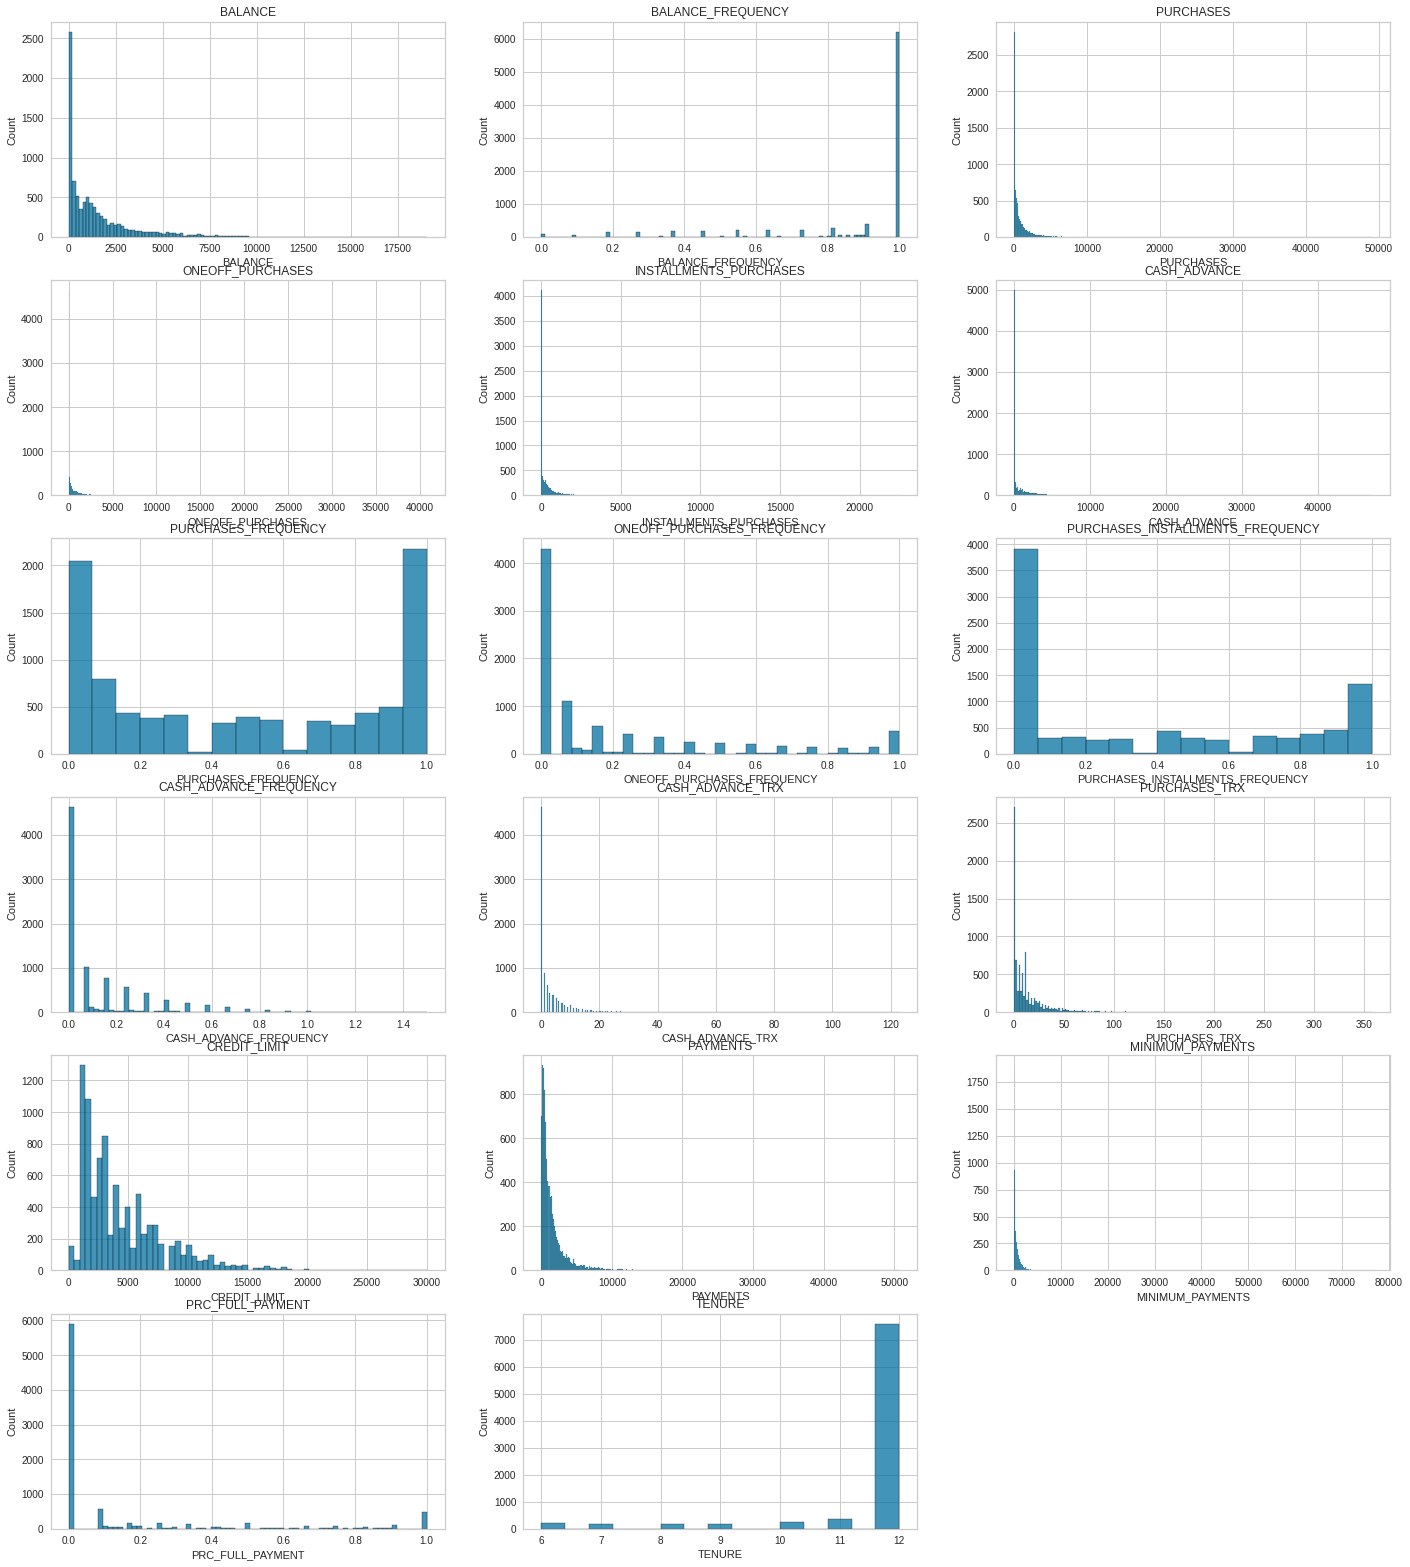

In [ ]:
hist_plotter(data)

Text(0.5, 1.0, 'INSTALLMENTS_PURCHASES')

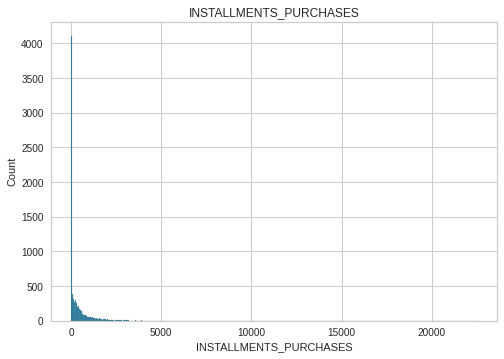

In [ ]:
col = "INSTALLMENTS_PURCHASES" #@param ["BALANCE","BALANCE_FREQUENCY","PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","PURCHASES_FREQUENCY","ONEOFF_PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY","CASH_ADVANCE_FREQUENCY","CASH_ADVANCE_TRX","PURCHASES_TRX","CREDIT_LIMIT","PAYMENTS","MINIMUM_PAYMENTS","PRC_FULL_PAYMENT","TENURE"]
sns.histplot(x = col, data = data)
plt.title(col)


### NOTE 10: Boîte à moustaches (box plot)

> Les box plots nous permet de detecter les outliers. Il permet de mieux afficher les outliers. Comme évoqué ci-haut les colonnes PURCHASES_INSTALLMENTS_FREQUENCY et PURCHASES_FREQUENCY ne presentent pas d'outliers, cela peut être verifier visuellement.   

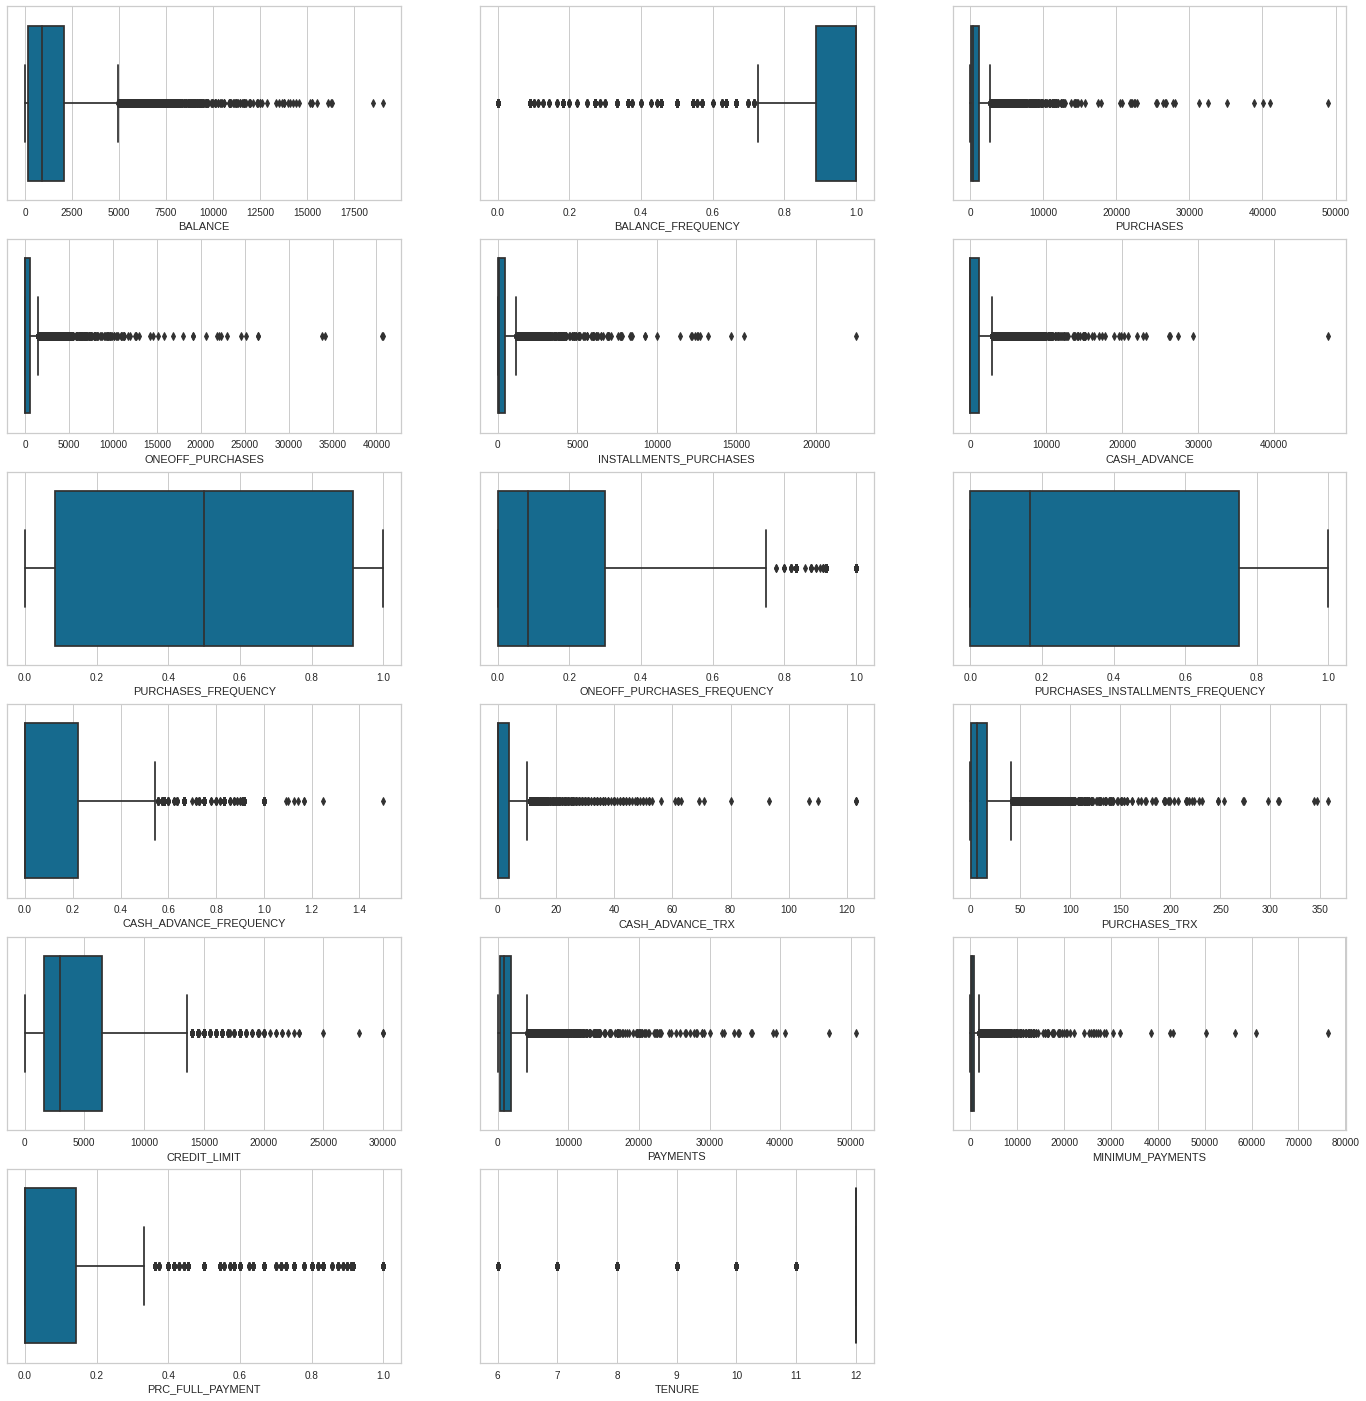

In [ ]:
# Affichage du box plot de chaque colonne
box_plotter(data)

# Data Preprocessing

### NOTE 11: Elimination des valeurs aberrantes ou non

> **Une valeur aberrante** est une observation qui se situe à une distance anormale d'autres valeurs dans un échantillon aléatoire d'une population. 
* Donc il est important de gérer ces valeurs
* Ci-haut nous avons évoqués notre stratègie pour remplacer ces outliers.
* Pour ce faire nous avons implementer cette stratègie à l'aide de la fonction outlier_replacer.   

In [ ]:
# Choix entre remplacer les valeurs d'outliers ou les laisser.    
outlier_flag = "True" #@param ['False', 'True']
if outlier_flag == 'True':
  outlier_replacer(data)

### NOTE 12: Matrice de correlations et Heapmap
> Les correlations et le heapmap nous donnent  les valeurs de correlations entre variables. On peut remarquer l'existence de correlation entre certaines  variables. Ceci sera exploitée lors de l'analyse en composante principale (PCA).    

In [ ]:
data.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.403457,0.095805,0.124043,0.009457,0.557393,-0.108922,0.081477,-0.096473,0.497089,0.500925,0.057123,0.488516,0.350558,0.802934,-0.419972,0.075417
BALANCE_FREQUENCY,0.403457,1.000000,0.184972,0.149539,0.161057,0.102849,0.222217,0.199187,0.180675,0.186646,0.175467,0.248062,0.107968,0.133318,0.306531,-0.183459,0.186697
PURCHASES,0.095805,0.184972,1.000000,0.830603,0.706135,-0.177093,0.631891,0.683525,0.488919,-0.207612,-0.190023,0.808546,0.330410,0.501153,0.071449,0.212936,0.120207
ONEOFF_PURCHASES,0.124043,0.149539,0.830603,1.000000,0.286764,-0.116870,0.408137,0.821933,0.152872,-0.127137,-0.117956,0.622341,0.321476,0.422124,0.045047,0.091038,0.087002
INSTALLMENTS_PURCHASES,0.009457,0.161057,0.706135,0.286764,1.000000,-0.185467,0.688315,0.249382,0.780193,-0.220042,-0.200208,0.725475,0.191926,0.324137,0.052574,0.254259,0.111298
CASH_ADVANCE,0.557393,0.102849,-0.177093,-0.116870,-0.185467,1.000000,-0.319499,-0.134830,-0.264589,0.769767,0.801425,-0.203801,0.258418,0.331303,0.420883,-0.227197,-0.099027
PURCHASES_FREQUENCY,-0.108922,0.222217,0.631891,0.408137,0.688315,-0.319499,1.000000,0.499498,0.862934,-0.336823,-0.315382,0.795194,0.118192,0.163930,-0.052645,0.316356,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.081477,0.199187,0.683525,0.821933,0.249382,-0.134830,0.499498,1.000000,0.143475,-0.121845,-0.118664,0.650300,0.293008,0.336919,0.007255,0.123273,0.077257
PURCHASES_INSTALLMENTS_FREQUENCY,-0.096473,0.180675,0.488919,0.152872,0.780193,-0.264589,0.862934,0.143475,1.000000,-0.285161,-0.264110,0.700146,0.057750,0.120975,-0.023301,0.266671,0.073275
CASH_ADVANCE_FREQUENCY,0.497089,0.186646,-0.207612,-0.127137,-0.220042,0.769767,-0.336823,-0.121845,-0.285161,1.000000,0.930204,-0.217631,0.128309,0.213939,0.360433,-0.268737,-0.127145


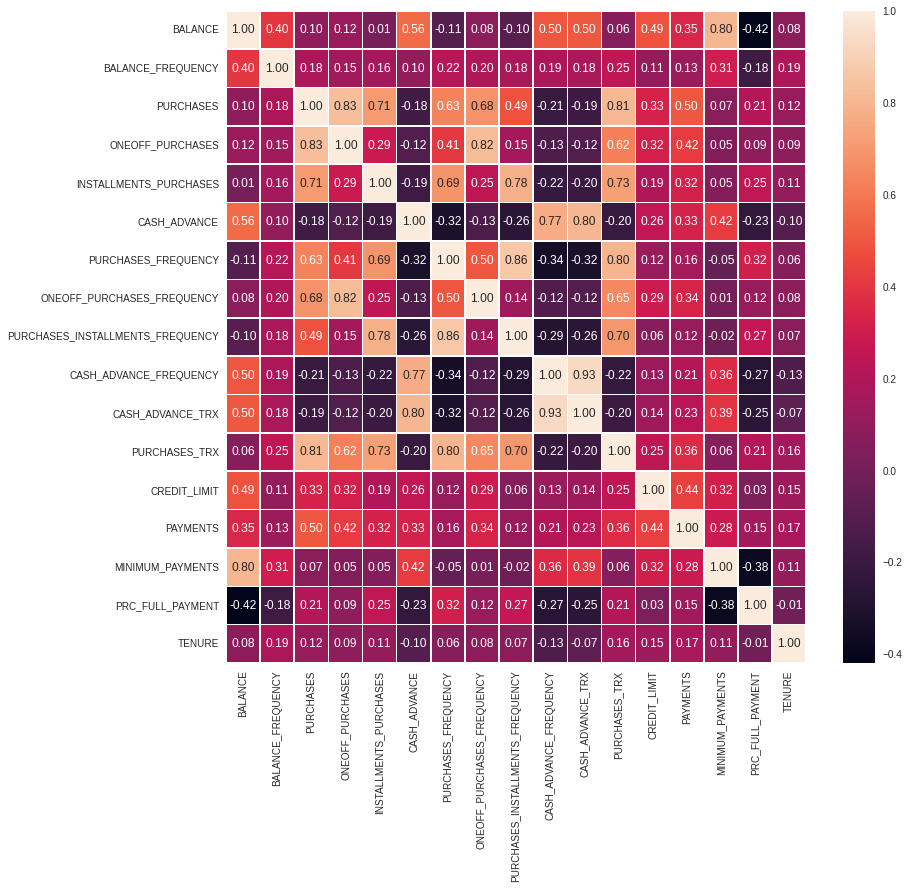

In [ ]:
plt.figure(figsize=(13,12))
sns.heatmap(data.corr(),annot=True,linewidths=0.6,fmt=".2f")
plt.show()

### NOTE 13: Normalisation et standardisation des données

> La standardisation des données joue un rôle très important, pour ce faire nous decidons de créer une copie standardisée de données pour évaluer l'impact que celle ci a sur le clustering.  

In [ ]:
data_normalize = StandardScaler().fit_transform(data)
dataframe_normalize = pd.DataFrame(data_normalize, columns=data.columns)

# Data clustering

## Description:
> -  Le clustering est une technique d'apprentissage automatique permettant de regrouper des chaînes de données par distance ou par similarité. Il s'agit d'une méthode non supervisée et populaire pour une analyse des données.

>-  Les méthodes de clustering utilisées sont : le Kmeans, le DBSCAN. Bayesian Mixtures.

>-  Ici on applique ces méthodes de clustering après normalisation de nos données. 

## Kmeans

> Le partitionnement en k-moyennes est une méthode de partitionnement de données et un problème d'optimisation combinatoire. Étant donnés des points et un entier k, le problème est de diviser les points en k groupes, souvent appelés clusters, de façon à minimiser une certaine fonction. (Wikipédia)

In [ ]:
# Kmeans en choisant le nombre de clusters 
n_clusters = 7 #@param {type:"number"}
kmean = KMeans(n_clusters)
kmean.fit(data_normalize) 
clusters = kmean.predict(data_normalize)

dataframe_normalize['cluster'] = clusters

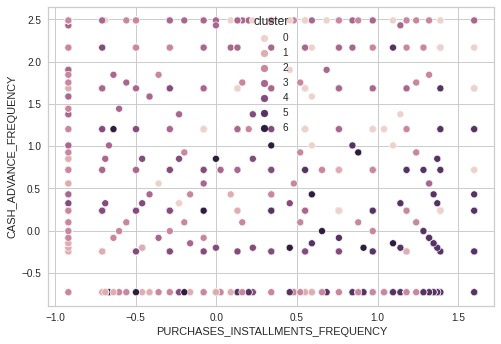

In [ ]:
col1 = "BALANCE" #@param ["BALANCE","BALANCE_FREQUENCY","PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","PURCHASES_FREQUENCY","ONEOFF_PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY","CASH_ADVANCE_FREQUENCY","CASH_ADVANCE_TRX","PURCHASES_TRX","CREDIT_LIMIT","PAYMENTS","MINIMUM_PAYMENTS","PRC_FULL_PAYMENT","TENURE"]
col2 = "INSTALLMENTS_PURCHASES" #@param ["BALANCE","BALANCE_FREQUENCY","PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","PURCHASES_FREQUENCY","ONEOFF_PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY","CASH_ADVANCE_FREQUENCY","CASH_ADVANCE_TRX","PURCHASES_TRX","CREDIT_LIMIT","PAYMENTS","MINIMUM_PAYMENTS","PRC_FULL_PAYMENT","TENURE"]
sns.scatterplot(data=dataframe_normalize,x=col1,y=col2,hue="cluster")

In [ ]:
# Groupemement par cluster
dataframe_normalize.groupby("cluster").agg(['mean',"count"])

BALANCE       BALANCE_FREQUENCY       PURCHASES        \
             mean count              mean count      mean count   
cluster                                                           
0        1.606966   652          0.530871   652  1.566686   652   
1       -0.808375  1393         -1.779675  1393 -0.472908  1393   
2       -0.386191   578         -0.673198   578 -0.497655   578   
3        1.169684  1396          0.354265  1396 -0.596877  1396   
4       -0.021982  2102          0.552508  2102 -0.560818  2102   
5       -0.551833  1639          0.259986  1639  0.053197  1639   
6       -0.319895  1190          0.369769  1190  1.554468  1190   

        ONEOFF_PURCHASES       INSTALLMENTS_PURCHASES        ... CREDIT_LIMIT  \
                    mean count                   mean count  ...         mean   
cluster                                                      ...                
0               1.251465   652               1.325607   652  ...     1.145610   
1              -0.324086  1393              -0.438338  1393  ...    -0.184311   
2              -0.359564   578              -0.456963   578  ...    -0.598299   
3              -0.427260  1396              -0.570747  1396  ...     0.551222   
4              -0.318841  2102              -0.626839  2102  ...    -0.415920   
5              -0.516603  1639               0.786143  1639  ...    -0.367316   
6               1.644282  1190               0.702793  1190  ...     0.472615   

               PAYMENTS       MINIMUM_PAYMENTS       PRC_FULL_PAYMENT        \
        count      mean count             mean count             mean count   
cluster                                                                       
0         652  1.129637   652         1.474302   652        -0.466496   652   
1        1393 -0.371799  1393        -0.622814  1393         0.355780  1393   
2         578 -0.641896   578        -0.433670   578        -0.079016   578   
3        1396  0.560102  1396         0.911061  1396        -0.410599  1396   
4        2102 -0.466839  2102        -0.048172  2102        -0.538858  2102   
5        1639 -0.353841  1639        -0.291887  1639         0.446125  1639   
6        1190  0.782982  1190        -0.449736  1190         0.696556  1190   

           TENURE        
             mean count  
cluster                  
0        0.275870   652  
1        0.222282  1393  
2       -3.256588   578  
3        0.118201  1396  
4        0.280339  2102  
5        0.204757  1639  
6        0.254559  1190  

[7 rows x 34 columns]

### NOTE 14 : Nombre de Clusters optimal

> **Nombre optimal de cluster**: 7

> Plusieurs valeurs peuvent être optimales : 3, 5, 7, 8, 13 (cf Figure) 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


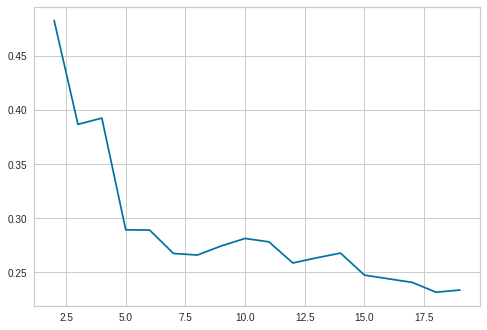

In [ ]:
# Recherche du nombre de clusters optimal
x=[]
y=[]
y_inertia =[]
for k in range(2,20):
  x.append(k)
  km= KMeans(n_clusters=k)
  km.fit(data)
  clusters = km.predict(data)
  y.append(silhouette_score(data,clusters))
  y_inertia.append(km.inertia_)
sns.lineplot(x,y)

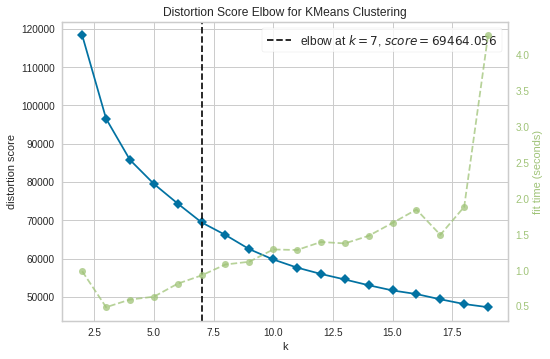

In [ ]:
visualizer = KElbowVisualizer(kmean, k=(2,20))
visualizer.fit(data_normalize)
visualizer.show()

## DBScan

 
> DBSCAN est un algorithme de partitionnement de données proposé en 1996 par Martin Ester, Hans-Peter Kriegel, Jörg Sander et Xiaowei Xu. Il s'agit d'un algorithme fondé sur la densité dans la mesure qui s’appuie sur la densité estimée des clusters pour effectuer le partitionnement. (Wikipédia)

In [ ]:
dataframe_normalize2 = pd.DataFrame(data_normalize, columns=data.columns)

In [ ]:
DBSCAN_model = DBSCAN(eps=2)

# Fit the model
yc = DBSCAN_model.fit_predict(data_normalize)

dataframe_normalize2['cluster'] = yc
dataframe_normalize2.groupby("cluster").agg(['mean',"count"])

BALANCE       BALANCE_FREQUENCY       PURCHASES        \
             mean count              mean count      mean count   
cluster                                                           
-1       0.530134   614         -0.097178   614  0.846298   614   
 0      -0.039186  8326          0.007197  8326 -0.064080  8326   
 1       0.352395     5          0.616459     5  0.781664     5   
 2      -0.199827     5         -0.667228     5  1.998948     5   

        ONEOFF_PURCHASES       INSTALLMENTS_PURCHASES        ... CREDIT_LIMIT  \
                    mean count                   mean count  ...         mean   
cluster                                                      ...                
-1              0.758118   614               0.503035   614  ...     0.626239   
 0             -0.056846  8326              -0.037919  8326  ...    -0.045919   
 1             -0.565809     5               2.116105     5  ...    -0.224409   
 2              2.128108     5              -0.746029     5  ...    -0.212588   

               PAYMENTS       MINIMUM_PAYMENTS       PRC_FULL_PAYMENT        \
        count      mean count             mean count             mean count   
cluster                                                                       
-1        614  0.938717   614         0.536572   614         0.082226   614   
 0       8326 -0.070077  8326        -0.039709  8326        -0.005380  8326   
 1          5  2.094492     5         0.847355     5        -0.509035     5   
 2          5 -0.676344     5        -0.615826     5        -0.629277     5   

           TENURE        
             mean count  
cluster                  
-1      -0.640916   614  
 0       0.048536  8326  
 1       0.360680     5  
 2      -2.478837     5  

[4 rows x 34 columns]

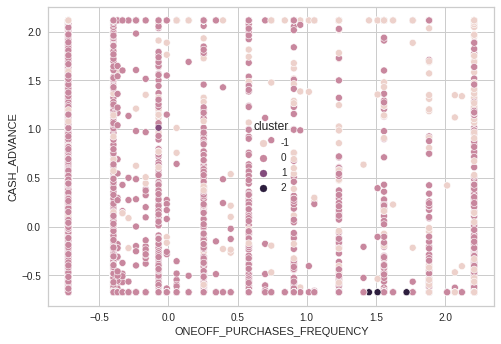

In [ ]:
col1 = "ONEOFF_PURCHASES_FREQUENCY" #@param ["BALANCE","BALANCE_FREQUENCY","PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","PURCHASES_FREQUENCY","ONEOFF_PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY","CASH_ADVANCE_FREQUENCY","CASH_ADVANCE_TRX","PURCHASES_TRX","CREDIT_LIMIT","PAYMENTS","MINIMUM_PAYMENTS","PRC_FULL_PAYMENT","TENURE"]
col2 = "CASH_ADVANCE" #@param ["BALANCE","BALANCE_FREQUENCY","PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","PURCHASES_FREQUENCY","ONEOFF_PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY","CASH_ADVANCE_FREQUENCY","CASH_ADVANCE_TRX","PURCHASES_TRX","CREDIT_LIMIT","PAYMENTS","MINIMUM_PAYMENTS","PRC_FULL_PAYMENT","TENURE"]
sns.scatterplot(data=dataframe_normalize2,x=col1,y=col2,hue="cluster")

## Bayesian Gaussian Mixtures

> Un modèle de mélange gaussien est un modèle statistique exprimé selon une densité mélange. Il sert d'habitude à estimer de façon paramétrique la distribution de variables aléatoires en les modélisant comme somme de plusieurs gaussiennes, appelées noyaux.

In [ ]:
dataframe_normalize3 = pd.DataFrame(data_normalize, columns=data.columns)

In [ ]:
bg = BayesianGaussianMixture(n_components=5)
clusters = bg.fit_predict(data_normalize)

dataframe_normalize3["cluster"] = clusters
dataframe_normalize3.groupby("cluster").agg(['mean',"count"])

BALANCE       BALANCE_FREQUENCY       PURCHASES        \
             mean count              mean count      mean count   
cluster                                                           
0       -0.112874   945         -0.833155   945 -0.823196   945   
1       -0.315734  3366          0.289851  3366  0.539739  3366   
2        0.558427  1893          0.616459  1893 -0.723221  1893   
3        0.561558  1756          0.288805  1756  0.452492  1756   
4       -0.882597   990         -1.881219   990 -0.469051   990   

        ONEOFF_PURCHASES       INSTALLMENTS_PURCHASES        ... CREDIT_LIMIT  \
                    mean count                   mean count  ...         mean   
cluster                                                      ...                
0              -0.668445   945              -0.743735   945  ...    -0.268330   
1               0.368394  3366               0.523148  3366  ...     0.044378   
2              -0.494868  1893              -0.746029  1893  ...    -0.036322   
3               0.415514  1756               0.369474  1756  ...     0.220437   
4              -0.405244   990              -0.297627   990  ...    -0.216296   

               PAYMENTS       MINIMUM_PAYMENTS       PRC_FULL_PAYMENT        \
        count      mean count             mean count             mean count   
cluster                                                                       
0         945  0.011999   945        -0.168190   945        -0.139637   945   
1        3366  0.055115  3366        -0.236658  3366         0.364026  3366   
2        1893 -0.145977  1893         0.382709  1893        -0.561672  1893   
3        1756  0.427626  1756         0.507716  1756        -0.258731  1756   
4         990 -0.678215   990        -0.667161   990         0.428508   990   

           TENURE        
             mean count  
cluster                  
0       -0.883141   945  
1        0.102719  3366  
2        0.360680  1893  
3       -0.090814  1756  
4       -0.034830   990  

[5 rows x 34 columns]

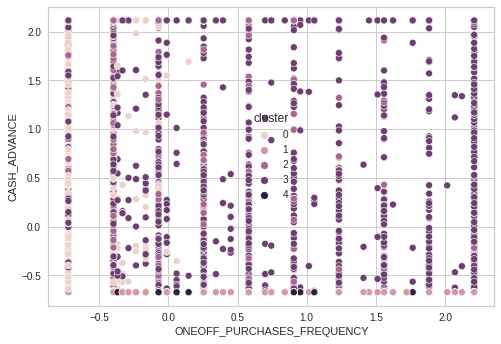

In [ ]:
col1 = "ONEOFF_PURCHASES_FREQUENCY" #@param ["BALANCE","BALANCE_FREQUENCY","PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","PURCHASES_FREQUENCY","ONEOFF_PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY","CASH_ADVANCE_FREQUENCY","CASH_ADVANCE_TRX","PURCHASES_TRX","CREDIT_LIMIT","PAYMENTS","MINIMUM_PAYMENTS","PRC_FULL_PAYMENT","TENURE"]
col2 = "CASH_ADVANCE" #@param ["BALANCE","BALANCE_FREQUENCY","PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","PURCHASES_FREQUENCY","ONEOFF_PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY","CASH_ADVANCE_FREQUENCY","CASH_ADVANCE_TRX","PURCHASES_TRX","CREDIT_LIMIT","PAYMENTS","MINIMUM_PAYMENTS","PRC_FULL_PAYMENT","TENURE"]
sns.scatterplot(data=dataframe_normalize3,x=col1,y=col2,hue="cluster")

# PCA Analysis

> L'analyse en composantes principales est une technique populaire pour analyser de grands ensembles de données contenant un nombre élevé de dimensions/caractéristiques par observation, augmentant l'interprétabilité des données tout en préservant le maximum d'informations et permettant la visualisation de données multidimensionnelles.



### NOTE 15: Nombre de composantes principales à retenir

> * Le nombre d'axes retenues est celui à partir duquel on obtient 90% de l'information.
>*  Nombre composantes retenues : 8     
> * Mais nous avons appliquer le clustering sur les deux premiers axes. (55% d'info)

In [ ]:
n_components = 2 #@param {type:"number"}
pca = PCA(n_components) 
data_pca = pca.fit_transform(data_normalize)
print(sum(pca.explained_variance_ratio_))

0.5522678631428916


In [ ]:
dataframe_pca = pd.DataFrame(data_pca, columns=['Axe_'+ str(i) for i in range(1, data_pca.shape[1] + 1)])

> Sans PCA, on obtient  des clusters pas cohérents, cela est dû au nombre des variables (18).

> Nous allons proceder à l'application du PCA  

# Clustering after PCA analysis

## KMEANs

### NOTE 16 : Nombre de Clusters optimal

> **Nombre optimal de cluster**: 4


In [ ]:
n_clusters = 4 #@param {type:"number"}
kmean = KMeans(n_clusters)
kmean.fit(data_pca) 
clusters = kmean.predict(data_pca)
dataframe_pca['cluster'] = clusters

In [ ]:
dataframe_pca.groupby("cluster").agg(['mean',"count"])

Axe_1           Axe_2      
             mean count      mean count
cluster                                
0       -1.765640  2867 -0.970078  2867
1        3.714456  1570  1.311185  1570
2       -1.944870  1680  2.738718  1680
3        0.881672  2833 -1.369006  2833

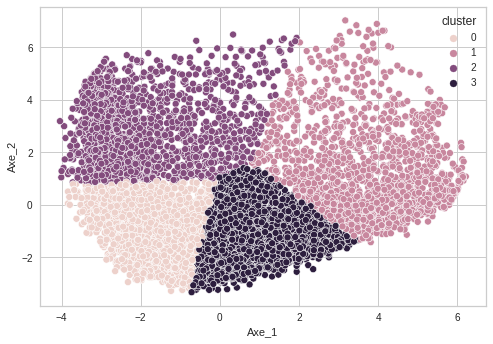

In [ ]:
sns.scatterplot(data=dataframe_pca,x="Axe_1",y="Axe_2",hue="cluster")

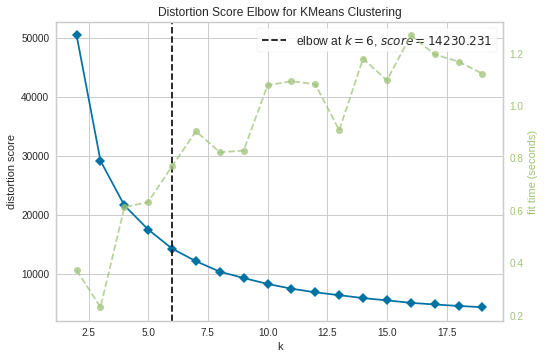

In [ ]:
visualizer = KElbowVisualizer(kmean, k=(2,20))
visualizer.fit(data_pca)
visualizer.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


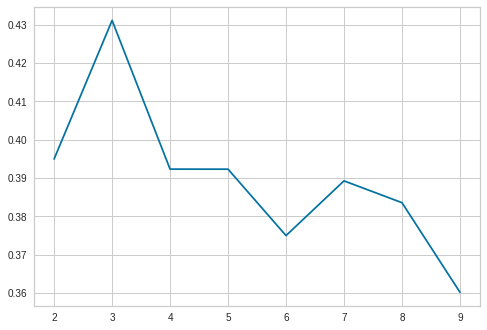

In [ ]:
x=[]
y=[]
y_inertia =[]
for k in range(2,10):
  x.append(k)
  km= KMeans(n_clusters=k)
  km.fit(data_pca)
  clusters = km.predict(data_pca)
  y.append(silhouette_score(data_pca,clusters))
  y_inertia.append(km.inertia_)
sns.lineplot(x,y)

## DBSCAN

In [ ]:
db = DBSCAN(eps=1.7)
clusters = db.fit_predict(data_pca)
dataframe_pca['cluster'] = clusters

In [ ]:
dataframe_pca.groupby("cluster").agg(['mean',"count"])

Axe_1               Axe_2      
                 mean count          mean count
cluster                                        
0        2.804399e-17  8950 -4.504156e-17  8950

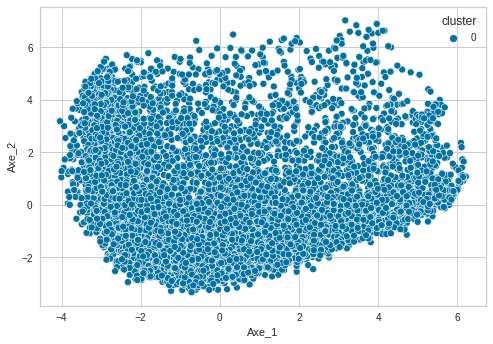

In [ ]:
sns.scatterplot(data=dataframe_pca,x="Axe_1",y="Axe_2",hue="cluster")

## Bayesian Gaussian Mixtures

In [ ]:
bg = BayesianGaussianMixture(n_components=4)
clusters = bg.fit_predict(data_pca)

dataframe_pca["cluster"] = clusters
dataframe_pca.groupby("cluster").agg(['mean',"count"])

/usr/local/lib/python3.8/dist-packages/sklearn/mixture/_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


Axe_1           Axe_2      
             mean count      mean count
cluster                                
0       -2.371535  2647  0.069299  2647
1        4.001241  1166  1.873365  1166
2        0.666166  3984 -1.385620  3984
3       -0.903729  1153  2.734200  1153

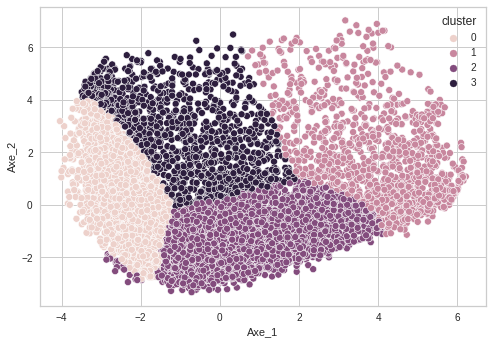

In [ ]:
sns.scatterplot(data=dataframe_pca,x="Axe_1",y="Axe_2",hue="cluster")

### Conclusion sur les clustering

> Après avoir appliqué les différentes méthodes de clustering nous avons remarqué que les données peuvent être divisées en 4 clusters (Kmeans).

> La meilleure méthode de clustering est le Kmeans, car après la visualisation les données ont été  bien separées. 

1. Groupe 0 : Personnes ayant une limite de crédit moyenne à élevée qui effectuent tous types d'achats.

2. Groupe 1 : Ce groupe compte plus de personnes ayant des paiements dus qui prennent plus souvent des avances en espèces.

3. Groupe 2 : Les moins dépensiers avec des limites de crédit moyennes à élevées qui achètent principalement en plusieurs versements.

4. Groupe 3 : Les personnes qui dépensent peu d'argent et qui ont une limite de crédit moyenne à élevée